In [17]:
import pandas as pd
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib as plt

In [52]:
ufo_data = pd.read_csv("scrubbed.csv")
ufo_data.head()

FileNotFoundError: [Errno 2] File scrubbed.csv does not exist: 'scrubbed.csv'

In [66]:
ufo_usa=ufo_data[ufo_data.country.eq("us")]
ufo_usa.head()
ufo_usa.tail()

                 

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6528,-97.477778


In [61]:
ufo_usa[['Month', 'Day', 'Time']]= ufo_usa['datetime'].str.split('/',expand=True)


ufo_usa['Year']= ufo_usa['Time'].str[0:4]
ufo_usa['Time']= ufo_usa['Time'].str[5:10]
ufo_usa.head()

/Users/heatherallardice/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-61-9677cd20ffe6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_usa['Year']= ufo_usa['Time'].str[0:4]
<ipython-input-61-9677cd20ffe6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,10,20:30,1949
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,10,21:00,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,10,20:00,1960
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,10,10,19:00,1961
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,10,10,23:45,1965


In [65]:


ufo_dates = ufo_usa[ufo_usa['Year'].between('1993', '2020')]
ufo_dates.head()
ufo_dates.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444,9,9,21:15,2013
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500,9,9,22:00,2013
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444,9,9,22:00,2013
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556,9,9,22:20,2013
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6528,-97.477778,9,9,23:00,2013


In [69]:
ufo_dates.to_csv(r'/Users/heatherallardice/Desktop/personal-data/06-Project-1/project-1-alien-analysis/data\ufo_dates.csv', index = False)

In [4]:
ufo_data_2 = pd.read_csv("ufo_dates.csv")
ufo_data_2.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1995 19:45,milwaukee,wi,us,NaN,120,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.038889,-87.906389,10,10,19:45,1995


In [7]:
ufo_data_2['shape'].replace('', np.nan, inplace=True)

In [8]:
ufo_data_2.count()

datetime                59592
city                    59592
state                   59592
country                 59592
shape                   58131
duration (seconds)      59592
duration (hours/min)    59592
comments                59581
date posted             59592
latitude                59592
longitude               59592
Month                   59592
Day                     59592
Time                    59592
Year                    59592
dtype: int64

In [11]:
# counting the nulls
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      ufo_data_2.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 datetime                   0
city                       0
state                      0
country                    0
shape                   1461
duration (seconds)         0
duration (hours/min)       0
comments                  11
date posted                0
latitude                   0
longitude                  0
Month                      0
Day                        0
Time                       0
Year                       0
dtype: int64


In [14]:
# removing the nulls 

ufo_data_2.dropna(subset=['shape'], inplace=True)
ufo_data_2.count()

datetime                58131
city                    58131
state                   58131
country                 58131
shape                   58131
duration (seconds)      58131
duration (hours/min)    58131
comments                58125
date posted             58131
latitude                58131
longitude               58131
Month                   58131
Day                     58131
Time                    58131
Year                    58131
dtype: int64

In [16]:
# frequncy of shape

ufo_data_2['shape'].value_counts()

light        12837
triangle      6027
circle        5638
fireball      4996
unknown       4204
other         4027
sphere        3976
disk          2963
oval          2668
formation     1891
changing      1513
cigar         1351
flash         1035
rectangle      945
cylinder       928
diamond        863
chevron        744
teardrop       571
egg            528
cone           234
cross          180
delta            5
round            2
hexagon          1
pyramid          1
flare            1
crescent         1
changed          1
Name: shape, dtype: int64

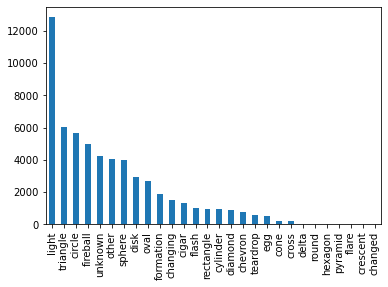

In [20]:

ufo_data_2['shape'].value_counts().plot.bar()

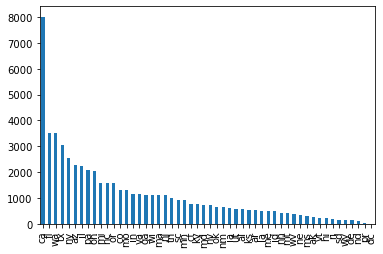

In [21]:
ufo_data_2['state'].value_counts().plot.bar()

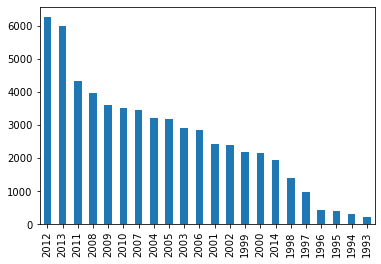

In [23]:
ufo_data_2['Year'].value_counts().plot.bar()


In [25]:
ufo_2012= ufo_data_2[ufo_data_2.Year.eq(2012)]

ufo_2012.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
158,10/10/2012 10:15,bridgeport,ct,us,circle,630,10:30,A Bright light that is a UFO,10/30/2012,41.166944,-73.205278,10,10,10:15,2012
159,10/10/2012 18:56,san diego,ca,us,sphere,240,4 minutes,Single white light or craft passed over and ve...,10/30/2012,32.715278,-117.156389,10,10,18:56,2012
160,10/10/2012 19:09,sterling heights,mi,us,oval,120,1-2 minutes,A black unknown craft is seen in the sky over ...,10/30/2012,42.580278,-83.030278,10,10,19:09,2012
161,10/10/2012 19:40,syracuse,ny,us,light,900,15 minutes,Went to move my car to the other side of the r...,10/30/2012,43.048056,-76.147778,10,10,19:40,2012
162,10/10/2012 19:45,syracuse,ny,us,circle,240,4 minutes,Bright orange circles going thru the sky in th...,10/30/2012,43.048056,-76.147778,10,10,19:45,2012


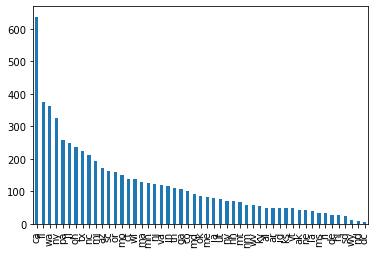

In [26]:
ufo_2012['state'].value_counts().plot.bar()

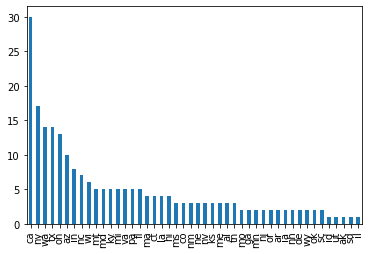

In [28]:
ufo_1993= ufo_data_2[ufo_data_2.Year.eq(1993)]
ufo_1993['state'].value_counts().plot.bar()

In [39]:
ufo_data_2[['Hour', 'Min']]= ufo_data_2['Time'].str.split(':',expand=True)

ufo_data_2['Time 1'] = ufo_data_2[['Hour', 'Min']].apply(lambda x: ''.join(x), axis=1)

ufo_data_2.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,Hour,Min,Time 1
0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,22,00,2200
1,10/10/1993 23:00,carthage,tn,us,other,60,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993,23,00,2300
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994,18,30,1830
3,10/10/1994 22:00,pinebergen,ar,us,light,5,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994,22,00,2200
6,10/10/1996 03:20,higginsville,mo,us,triangle,3,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996,03,20,0320


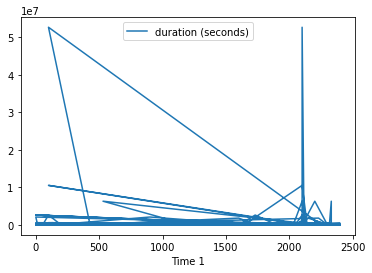

In [42]:
ufo_data_2['Time 1'] = ufo_data_2['Time 1'].astype(float)
ufo_data_2['duration (seconds)'] = ufo_data_2['duration (seconds)'].astype(float)
ufo_data_2.plot(x ='Time 1', y='duration (seconds)', kind = 'line')
